In [1]:
from cProfile import label
import numpy as np
import pandas as pd
import scipy as sp
from matplotlib import pyplot as plt
from scipy import optimize as op
from scipy import stats
from itertools import permutations

plt.rcParams["figure.figsize"] = (20,7)

In [2]:
def f1(x):
    return((1.+25.*x**2.)**(-1.))

def f2(x):
    inner_vals = np.max(np.column_stack([-np.ones(len(x)),4. * (x-.2)]), axis = 1)
    return(np.min(np.column_stack([np.ones(len(x)), inner_vals]), axis = 1))

def T(n,x):
    return(np.cos(n * np.arccos(x)))

def chebyshev(fun, n, x):
    k = np.arange(1., n + 1.)
    x_k = np.cos((2.*k-1.) * np.pi / (2.*n))
    alpha_0 = np.mean(fun(x_k))
    alpha_i = 2 * np.array([np.mean(fun(x_k) * T(i, x_k)) for i in np.arange(1., n)])
    alpha = np.concatenate([alpha_0.reshape(-1,1), alpha_i.reshape(-1,1)]).reshape(-1)
    T_i = np.array([T(i,x) for i in np.arange(n)]).reshape(-1)
    return(np.sum(alpha * T_i))

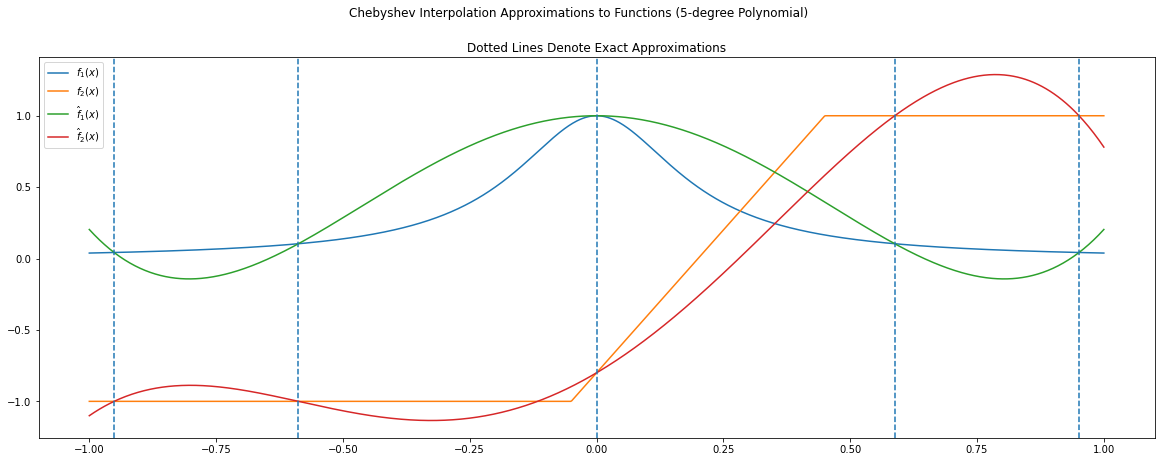

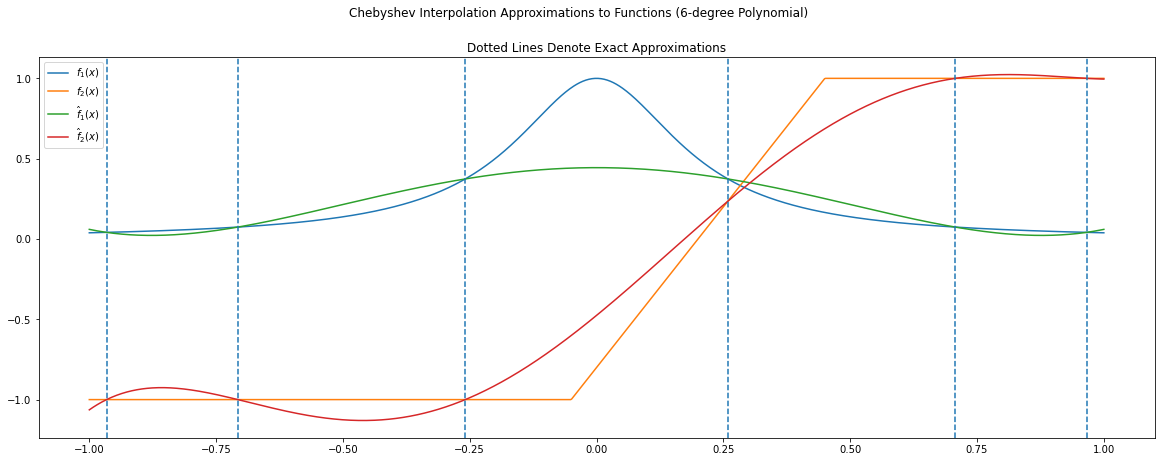

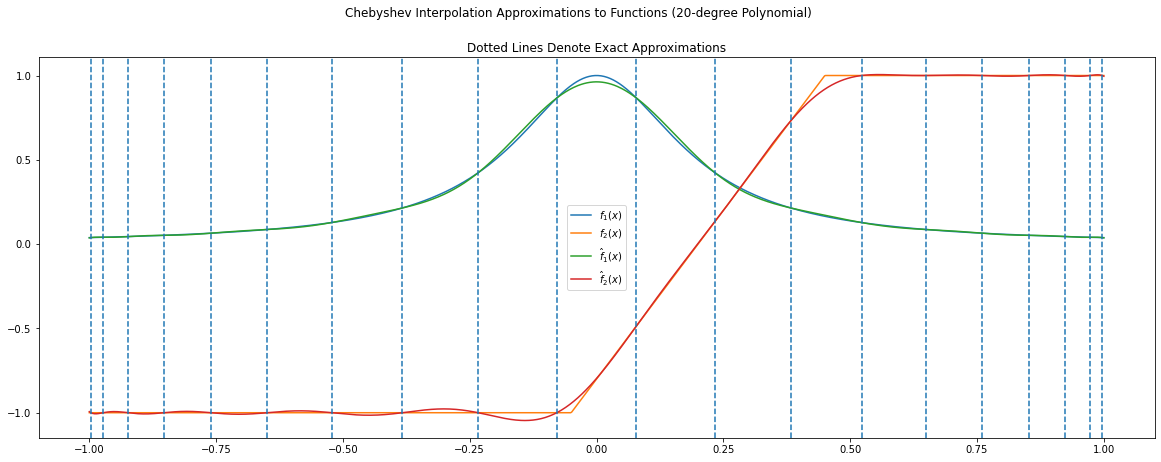

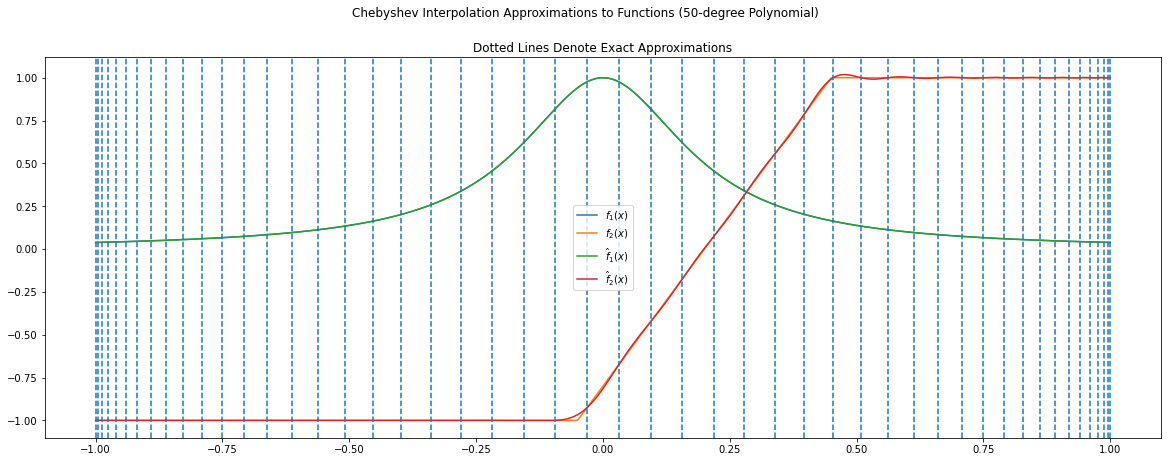

In [3]:
x_vals = np.linspace(-1,1,1000)
for poly_deg in [5., 6., 20.,50.]:
    plt.plot(x_vals, f1(x_vals), label = '$f_1(x)$')
    plt.plot(x_vals, f2(x_vals), label = '$f_2(x)$')
    plt.plot(x_vals, [chebyshev(f1, poly_deg, x) for x in x_vals], label = '$\hat{f}_1(x)$')
    plt.plot(x_vals, [chebyshev(f2, poly_deg, x) for x in x_vals], label = '$\hat{f}_2(x)$')
    for x_val in np.cos((2.*np.arange(1., poly_deg + 1.)-1.) * np.pi / (2.*poly_deg)):
        plt.axvline(x=x_val,ls='--')
    plt.legend()
    plt.suptitle('Chebyshev Interpolation Approximations to Functions ({}-degree Polynomial)'.format(int(poly_deg)))
    plt.title('Dotted Lines Denote Exact Approximations')
    plt.show()
    plt.close()
